In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('Train_BigMartSales.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.10,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


In [3]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066164,140.992878,1997.831867,2181.289052
std,4.643456,0.051641,62.275160,8.371760,1706.499641
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.030000,93.825000,1987.000000,834.245000
50%,12.600000,0.050000,143.010000,1999.000000,1794.330000
75%,16.850000,0.090000,185.645000,2004.000000,3101.300000
max,21.350000,0.330000,266.890000,2009.000000,13086.960000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Pre-processing

In [5]:
## Remove unnecessary variables
train.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.02,Dairy,249.81,1999,Medium,Tier 1,Supermarket Type1,3735.14
1,5.92,Regular,0.02,Soft Drinks,48.27,2009,Medium,Tier 3,Supermarket Type2,443.42
2,17.50,Low Fat,0.02,Meat,141.62,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,19.20,Regular,0.00,Fruits and Vegetables,182.10,1998,NaN,Tier 3,Grocery Store,732.38
4,8.93,Low Fat,0.00,Household,53.86,1987,High,Tier 3,Supermarket Type1,994.71


In [6]:
## Deal with Missing values

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(train) ## Pass your dataset name

Your selected dataframe has 10 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Outlet_Size,2410,28.3
Item_Weight,1463,17.2


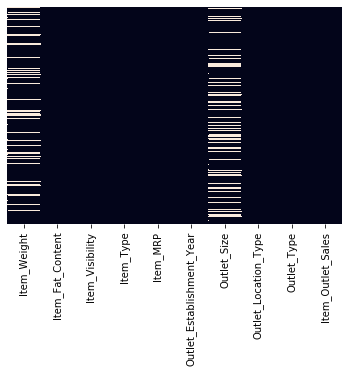

In [7]:
missingdata=train.isnull()
sns.heatmap(missingdata,yticklabels=False,cbar=False)

In [8]:
# Delete the columns with > 50% missing
missing_df = missing_values_table(train);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index) ## Change 50 to any number you want


print('We will remove %d columns.' % len(missing_columns))
print(missing_columns)

Your selected dataframe has 10 columns.
There are 2 columns that have missing values.
We will remove 0 columns.
[]


In [9]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0.00,np.mean(train['Item_Visibility'])) ## Replace 0 with mean
train['Outlet_Establishment_Year'] = 2019 - train['Outlet_Establishment_Year'] ## convert year into numbers


train['Outlet_Size'].fillna('Medium',inplace=True) ## replace NAN with Medium
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True) ## replace NAN with Mean of the Item Weight



missing_values_table(train) ## Double Check

Your selected dataframe has 10 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [10]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.020000,Dairy,249.81,20,Medium,Tier 1,Supermarket Type1,3735.14
1,5.92,Regular,0.020000,Soft Drinks,48.27,10,Medium,Tier 3,Supermarket Type2,443.42
2,17.50,Low Fat,0.020000,Meat,141.62,20,Medium,Tier 1,Supermarket Type1,2097.27
3,19.20,Regular,0.066164,Fruits and Vegetables,182.10,21,Medium,Tier 3,Grocery Store,732.38
4,8.93,Low Fat,0.066164,Household,53.86,32,High,Tier 3,Supermarket Type1,994.71


In [11]:
## Select non numerical categorical column names
mylist = list(train.select_dtypes(include=['object']).columns)
mylist

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
## Create dummy variables for non numerical categorical variables
dummies = pd.get_dummies(train[mylist], prefix= mylist)
dummies.head()

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [13]:
train.drop(mylist, axis=1, inplace = True) ## Drop Non numerical categorical columns
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.020000,249.81,20,3735.14
1,5.92,0.020000,48.27,10,443.42
2,17.50,0.020000,141.62,20,2097.27
3,19.20,0.066164,182.10,21,732.38
4,8.93,0.066164,53.86,32,994.71


In [14]:
train=pd.concat([train,dummies], axis =1 ) ## added encoded categorical columns
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.020000,249.81,20,3735.14,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.020000,48.27,10,443.42,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.020000,141.62,20,2097.27,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.066164,182.10,21,732.38,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.066164,53.86,32,994.71,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 36 columns):
Item_Weight                        8523 non-null float64
Item_Visibility                    8523 non-null float64
Item_MRP                           8523 non-null float64
Outlet_Establishment_Year          8523 non-null int64
Item_Outlet_Sales                  8523 non-null float64
Item_Fat_Content_LF                8523 non-null uint8
Item_Fat_Content_Low Fat           8523 non-null uint8
Item_Fat_Content_Regular           8523 non-null uint8
Item_Fat_Content_low fat           8523 non-null uint8
Item_Fat_Content_reg               8523 non-null uint8
Item_Type_Baking Goods             8523 non-null uint8
Item_Type_Breads                   8523 non-null uint8
Item_Type_Breakfast                8523 non-null uint8
Item_Type_Canned                   8523 non-null uint8
Item_Type_Dairy                    8523 non-null uint8
Item_Type_Frozen Foods             8523 non-null uint8
Item_

In [16]:
X = train.drop('Item_Outlet_Sales',1) ## This is the dependent variable
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.020000,249.81,20,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.020000,48.27,10,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.020000,141.62,20,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.066164,182.10,21,0,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,0.066164,53.86,32,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] ## Replace X with your indepedent data type
vif_s =pd.Series(vif, index =X.columns)
print(vif_s)

C:\Users\smukhopadhyay\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Item_Weight                         1.014694
Item_Visibility                     1.111746
Item_MRP                            1.013586
Outlet_Establishment_Year          49.044114
Item_Fat_Content_LF                      inf
Item_Fat_Content_Low Fat                 inf
Item_Fat_Content_Regular                 inf
Item_Fat_Content_low fat                 inf
Item_Fat_Content_reg                     inf
Item_Type_Baking Goods                   inf
Item_Type_Breads                         inf
Item_Type_Breakfast                      inf
Item_Type_Canned                         inf
Item_Type_Dairy                          inf
Item_Type_Frozen Foods                   inf
Item_Type_Fruits and Vegetables          inf
Item_Type_Hard Drinks                    inf
Item_Type_Health and Hygiene             inf
Item_Type_Household                      inf
Item_Type_Meat                           inf
Item_Type_Others                         inf
Item_Type_Seafood                        inf
Item_Type_

In [18]:
y=train.Item_Outlet_Sales
## Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

## Multiple Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [20]:
print("Model Performance Test: In terms of Error")

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## Higher the Explained Variance Score, the better the model is:
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred)*100)
## 95.9% of the variance is explained by the model

from sklearn.metrics import r2_score 
print('r2:',r2_score(y_test, y_pred)) ## Closer to 1 means better prediction

adj_r2=1 - float(len(y_test)-1)/(len(y_test)-len(regressor.coef_)-1)*(1 - metrics.r2_score(y_test,y_pred))
print("adj_r2=",adj_r2) ##Closer to 1 the better the prediction

Model Performance Test: In terms of Error
MAE: 820.3824863007604
MSE: 1212560.5563916783
RMSE: 1101.163274174942
Explained Variance Score: 56.81444498846828
r2: 0.5681413174313119
adj_r2= 0.5621456594027898


In [21]:
print("Model Performance Test: In terms of Cross validation")

from sklearn.model_selection import cross_val_score 
avg_mae= cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='neg_mean_absolute_error') 
print(avg_mae)
print ("Cross val Mean Abs Error:",avg_mae.mean())

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='explained_variance') 

Model Performance Test: In terms of Cross validation
[-875.68042023 -861.57962068 -853.15262963 -874.97851389 -839.36659564
 -838.98742851 -860.9740279  -784.24059945 -812.43081243 -858.72077358]
Cross val Mean Abs Error: -846.0111421943853


In [22]:
print ("Cross Val Explained Variance:",regression_avg.mean()*100)

Cross Val Explained Variance: 55.5731016732802


In [23]:
print("Model Performance Test: Bias-Variance")

## Bias Variance Test
r2_mc_train=regressor.score(X_train,y_train)
print("Training_r2=",r2_mc_train)

r2_mc_test=regressor.score(X_test,y_test)
print("Test_r2=",r2_mc_test)

print("\n")

print("Model Performance Test: MultiCollinearity")

## Do a multicollinearity test
vif_train=1/(1-r2_mc_train) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Train:",vif_train)

vif_test=1/(1-r2_mc_test) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Test:",vif_test)

Model Performance Test: Bias-Variance
Training_r2= 0.5607910705276078
Test_r2= 0.5681413174313119


Model Performance Test: MultiCollinearity
VIF Train: 2.276820740419072
VIF Test: 2.315572293353041


In [24]:
## 1: The model is able to understand 55.66% variability in the data
## 2: 54.9% of Item_Outlet_sales is driven by the independent variables listed here
## 3: Since adjusted r2 and r2 are close, all the variables are important
## 4: On an average, the prediction is off by 1160 with 54.8% confidence
## 5: There is not significant multicollinearity observed
## 6: The Model is free  from Variance problem
## 7: The model may have Bias problem as the adjusted r2 is low. We need to investigate further 
##    and check this metrics with other algorithms

In [25]:
coeff = DataFrame(X.columns) ## capture all the columns of X

(Outlet_Type_Grocery Store, -1646.4397644767575)         -1646.439764
(Outlet_Type_Supermarket Type2, -399.76473858671613)      -399.764739
(Item_Visibility, -337.1006229218033)                     -337.100623
(Outlet_Size_Medium, -322.83776240193663)                 -322.837762
(Outlet_Size_Small, -243.47777891849327)                  -243.477779
(Outlet_Location_Type_Tier 3, -220.08041837565875)        -220.080418
(Outlet_Type_Supermarket Type1, -160.50833263641834)      -160.508333
(Item_Type_Dairy, -101.64959032090785)                    -101.649590
(Item_Type_Others, -81.61539508078879)                     -81.615395
(Item_Type_Soft Drinks, -74.47579991508269)                -74.475800
(Item_Fat_Content_LF, -69.83222828047786)                  -69.832228
(Item_Type_Meat, -37.22627452006562)                       -37.226275
(Outlet_Establishment_Year, -36.95124227106899)            -36.951242
(Item_Type_Hard Drinks, -29.60347864646742)                -29.603479
(Item_Type_Snack Foo

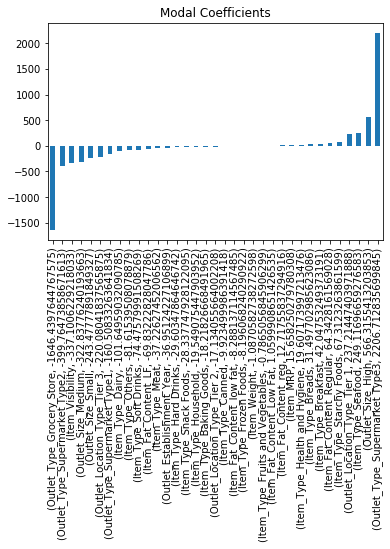

In [26]:
## printing all the co-efficients
coeff = DataFrame(X.columns) ## capture all the columns of X
coeff['Coefficient Estimate'] = Series(regressor.coef_).sort_values()
#print(coeff)

#predictors = X_train.columns
coef = Series(regressor.coef_,coeff).sort_values()
print(coef)


coef.plot(kind='bar', title='Modal Coefficients')

## Inference : 
Items are not getting sold in Grocery Stores.  
Supermarket : Type 3 has very high sales

In [27]:
## Lets validate it

train_inv = pd.read_csv('Train_BigMartSales.csv') ## Read the data once more

print("Mean Sales=",train_inv['Item_Outlet_Sales'].mean())
print("\n")

Mean Sales= 2181.289051976997




In [28]:
print(train_inv.groupby(['Outlet_Type'], as_index=False)['Item_Outlet_Sales'].max())
print("\n")

         Outlet_Type  Item_Outlet_Sales
0      Grocery Store            1775.69
1  Supermarket Type1           10256.65
2  Supermarket Type2            6768.52
3  Supermarket Type3           13086.96




In [29]:
print(train_inv.groupby(['Outlet_Type'], as_index=False)['Item_Outlet_Sales'].mean())

         Outlet_Type  Item_Outlet_Sales
0      Grocery Store         339.828596
1  Supermarket Type1        2316.181316
2  Supermarket Type2        1995.498869
3  Supermarket Type3        3694.038578


In [30]:
## Looking at values of Grocery Store and Supermarket Type 3
train_inv=train_inv[['Outlet_Type','Item_Outlet_Sales']]
train_inv=train_inv[train_inv['Outlet_Type'].isin (['Grocery Store','Supermarket Type3' ])]
train_inv.head(20) ## observe few random values

,Outlet_Type,Item_Outlet_Sales
3,Grocery Store,732.38
7,Supermarket Type3,4022.76
18,Supermarket Type3,2303.67
21,Supermarket Type3,4064.04
23,Grocery Store,214.39
28,Grocery Store,178.43
29,Grocery Store,125.84
30,Grocery Store,163.79
36,Supermarket Type3,2797.69
38,Supermarket Type3,388.16


## Ridge Regression (Will shrink the coefficients to reduce multicollinearity)

In [31]:
from sklearn.linear_model import Ridge
regressor = Ridge(alpha=0.04, normalize=True) ## play with alpha

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [32]:
print("Model Performance Test: In terms of Error")

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("\n")

print("Model Performance Test: In terms of Cross validation")

## Higher the Explained Variance Score, the better the model is:
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred)*100)
## 95.9% of the variance is explained by the model

from sklearn.model_selection import cross_val_score 
regression_avg_mae = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='neg_mean_absolute_error') 
print ("Cross val Mean Abs Error:",regression_avg_mae)

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='explained_variance') 
print ("Cross Val Explained Variance:",regression_avg.mean()*100)

print("Standard_Dev for Explained Variance=",regression_avg.std()*100)
print("Standard_Dev for Mean Abs Error=",regression_avg_mae.std()*100)

print("\n")

print("Model Performance Test: In terms of r2")


from sklearn.metrics import r2_score 
print('r2:',r2_score(y_test, y_pred)) ## Closer to 1 means better prediction

adj_r2=1 - float(len(y_test)-1)/(len(y_test)-len(regressor.coef_)-1)*(1 - metrics.r2_score(y_test,y_pred))
print("adj_r2=",adj_r2) ##Closer to 1 the better the prediction


print("\n")

print("Model Performance Test: Bias-Variance")

## Bias Variance Test
r2_mc_train=regressor.score(X_train,y_train)
print("Training_r2=",r2_mc_train)

r2_mc_test=regressor.score(X_test,y_test)
print("Test_r2=",r2_mc_test)

print("\n")

print("Model Performance Test: MultiCollinearity")

## Do a multicollinearity test
vif_train=1/(1-r2_mc_train) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Train:",vif_train)

vif_test=1/(1-r2_mc_test) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Test:",vif_test)

Model Performance Test: In terms of Error
MAE: 818.6279060058662
MSE: 1215939.830027353
RMSE: 1102.6966174008846


Model Performance Test: In terms of Cross validation
Explained Variance Score: 56.693937483593274
Cross val Mean Abs Error: [-876.3318552  -861.56920742 -852.97517429 -876.15586223 -840.17183048
 -839.11497819 -864.77046187 -783.30466448 -806.63819634 -859.55122293]
Cross Val Explained Variance: 55.47574444072099
Standard_Dev for Explained Variance= 2.5298236292097243
Standard_Dev for Mean Abs Error= 2866.6723482242724


Model Performance Test: In terms of r2
r2: 0.5669377745215174
adj_r2= 0.5609254072499001


Model Performance Test: Bias-Variance
Training_r2= 0.5592929344277622
Test_r2= 0.5669377745215174


Model Performance Test: MultiCollinearity
VIF Train: 2.2690809340702223
VIF Test: 2.3091369811696647


                                  0  Coefficient Estimate
0                       Item_Weight             -0.765371
1                   Item_Visibility           -463.699161
2                          Item_MRP             15.052529
3         Outlet_Establishment_Year              0.983384
4               Item_Fat_Content_LF            -93.741442
5          Item_Fat_Content_Low Fat            -22.082564
6          Item_Fat_Content_Regular             41.068176
7          Item_Fat_Content_low fat            -31.178871
8              Item_Fat_Content_reg            -14.010953
9            Item_Type_Baking Goods             -5.812728
10                 Item_Type_Breads             45.894064
11              Item_Type_Breakfast             62.381964
12                 Item_Type_Canned              7.399674
13                  Item_Type_Dairy            -73.374076
14           Item_Type_Frozen Foods             11.586140
15  Item_Type_Fruits and Vegetables             19.481494
16            

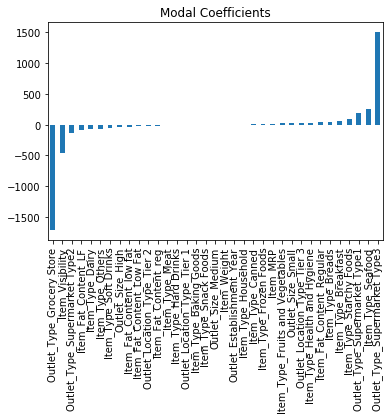

In [33]:
coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = Series(regressor.coef_)
print(coeff)

predictors = X_train.columns
coef = Series(regressor.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

## Lasso Regression (Will eliminate features even at small values of alpha)

In [34]:
from sklearn.linear_model import Lasso
regressor = Lasso(alpha=0.3, normalize=True) ## play with alpha
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Model Performance Test: In terms of Error")

### same old code

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("\n")

print("Model Performance Test: In terms of Cross validation")

## Higher the Explained Variance Score, the better the model is:
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred)*100)
## 95.9% of the variance is explained by the model

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='neg_mean_absolute_error') 
print ("Cross val Mean Abs Error:",regression_avg.mean())

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='explained_variance') 
print ("Cross Val Explained Variance:",regression_avg.mean()*100)

print("\n")

print("Model Performance Test: In terms of r2")


from sklearn.metrics import r2_score 
print('r2:',r2_score(y_test, y_pred)) ## Closer to 1 means better prediction

adj_r2=1 - float(len(y_test)-1)/(len(y_test)-len(regressor.coef_)-1)*(1 - metrics.r2_score(y_test,y_pred))
print("adj_r2=",adj_r2) ##Closer to 1 the better the prediction


print("\n")

print("Model Performance Test: Bias-Variance")

## Bias Variance Test
r2_mc_train=regressor.score(X_train,y_train)
print("Training_r2=",r2_mc_train)

r2_mc_test=regressor.score(X_test,y_test)
print("Test_r2=",r2_mc_test)

print("\n")

print("Model Performance Test: MultiCollinearity")

## Do a multicollinearity test
vif_train=1/(1-r2_mc_train) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Train:",vif_train)

vif_test=1/(1-r2_mc_test) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Test:",vif_test)

Model Performance Test: In terms of Error
MAE: 817.7746147504674
MSE: 1210322.3057976149
RMSE: 1100.1464928806595


Model Performance Test: In terms of Cross validation
Explained Variance Score: 56.89409706154031
Cross val Mean Abs Error: -843.7786974564467
Cross Val Explained Variance: 55.652235328824204


Model Performance Test: In terms of r2
r2: 0.5689384800535955
adj_r2= 0.5629538893363705


Model Performance Test: Bias-Variance
Training_r2= 0.5584003141482852
Test_r2= 0.5689384800535955


Model Performance Test: MultiCollinearity
VIF Train: 2.2644943645539435
VIF Test: 2.3198544841681383


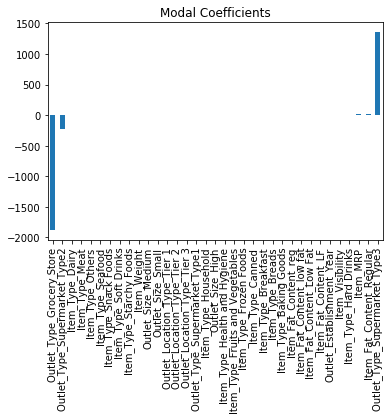

In [35]:
predictors = X_train.columns
coef = Series(regressor.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [36]:
## It has eliminated features and adjusted the co-efficients of important features accordingly

## ElasticNet (Best of Lasso and Ridge)

In [37]:
from sklearn.linear_model import ElasticNet
regressor = ElasticNet(alpha=0.8, l1_ratio=0.3,normalize=False) ## play with alpha and l1_ratio
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("Model Performance Test: In terms of Error")

### same old code

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("\n")

print("Model Performance Test: In terms of Cross validation")

## Higher the Explained Variance Score, the better the model is:
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred)*100)
## 95.9% of the variance is explained by the model

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='neg_mean_absolute_error') 
print ("Cross val Mean Abs Error:",regression_avg.mean())

from sklearn.model_selection import cross_val_score 
regression_avg = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10,scoring='explained_variance') 
print ("Cross Val Explained Variance:",regression_avg.mean()*100)

print("\n")

print("Model Performance Test: In terms of r2")


from sklearn.metrics import r2_score 
print('r2:',r2_score(y_test, y_pred)) ## Closer to 1 means better prediction

adj_r2=1 - float(len(y_test)-1)/(len(y_test)-len(regressor.coef_)-1)*(1 - metrics.r2_score(y_test,y_pred))
print("adj_r2=",adj_r2) ##Closer to 1 the better the prediction


print("\n")

print("Model Performance Test: Bias-Variance")

## Bias Variance Test
r2_mc_train=regressor.score(X_train,y_train)
print("Training_r2=",r2_mc_train)

r2_mc_test=regressor.score(X_test,y_test)
print("Test_r2=",r2_mc_test)

print("\n")

print("Model Performance Test: MultiCollinearity")

## Do a multicollinearity test
vif_train=1/(1-r2_mc_train) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Train:",vif_train)

vif_test=1/(1-r2_mc_test) ## to determine multi collinearity. Greater than 5 means very high multi collinearity
print("VIF Test:",vif_test)

Model Performance Test: In terms of Error
MAE: 953.2685041952901
MSE: 1662336.028344675
RMSE: 1289.3161087742117


Model Performance Test: In terms of Cross validation
Explained Variance Score: 40.85933284883156
Cross val Mean Abs Error: -965.5609709567012
Cross Val Explained Variance: 41.378472410322615


Model Performance Test: In terms of r2
r2: 0.4079518392683852
adj_r2= 0.39973220990479674


Model Performance Test: Bias-Variance
Training_r2= 0.4155452471527513
Test_r2= 0.4079518392683852


Model Performance Test: MultiCollinearity
VIF Train: 1.7109964374972872
VIF Test: 1.6890517804569558


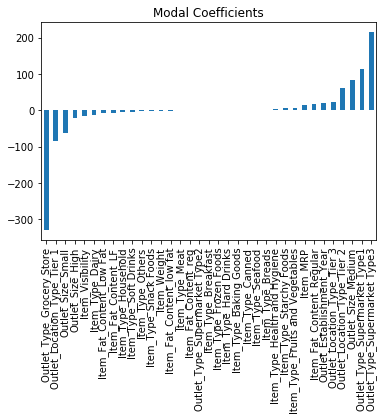

In [38]:
predictors = X_train.columns
coef = Series(regressor.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [39]:
## Co-efficients are reduced, but features are not fully eliminated